In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Google Play Store and Apple Store data
google_df = pd.read_csv("googleplaystore.csv")
apple_df = pd.read_csv("appleAppData.csv")

# View first few rows
google_df.head(), apple_df.head()


(                                                 App        Category  Rating  \
 0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
 1                                Coloring book moana  ART_AND_DESIGN     3.9   
 2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
 3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
 4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
 
   Reviews  Size     Installs  Type Price Content Rating  \
 0     159   19M      10,000+  Free     0       Everyone   
 1     967   14M     500,000+  Free     0       Everyone   
 2   87510  8.7M   5,000,000+  Free     0       Everyone   
 3  215644   25M  50,000,000+  Free     0           Teen   
 4     967  2.8M     100,000+  Free     0       Everyone   
 
                       Genres      Last Updated         Current Ver  \
 0               Art & Design   January 7, 2018               1.0.0   
 1  Art 

In [3]:
# Drop null values and duplicates
google_df.dropna(inplace=True)
google_df.drop_duplicates(inplace=True)

# Remove unwanted characters from 'Installs'
google_df['Installs'] = google_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Reviews' to numeric
google_df['Reviews'] = pd.to_numeric(google_df['Reviews'], errors='coerce')

# Keep only free apps
google_df = google_df[google_df['Type'] == 'Free']

# Preview cleaned data
google_df[['App', 'Category', 'Installs', 'Reviews', 'Rating']].head()


,App,Category,Installs,Reviews,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,10000,159,4.1
1,Coloring book moana,ART_AND_DESIGN,500000,967,3.9
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,5000000,87510,4.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,50000000,215644,4.5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,100000,967,4.3


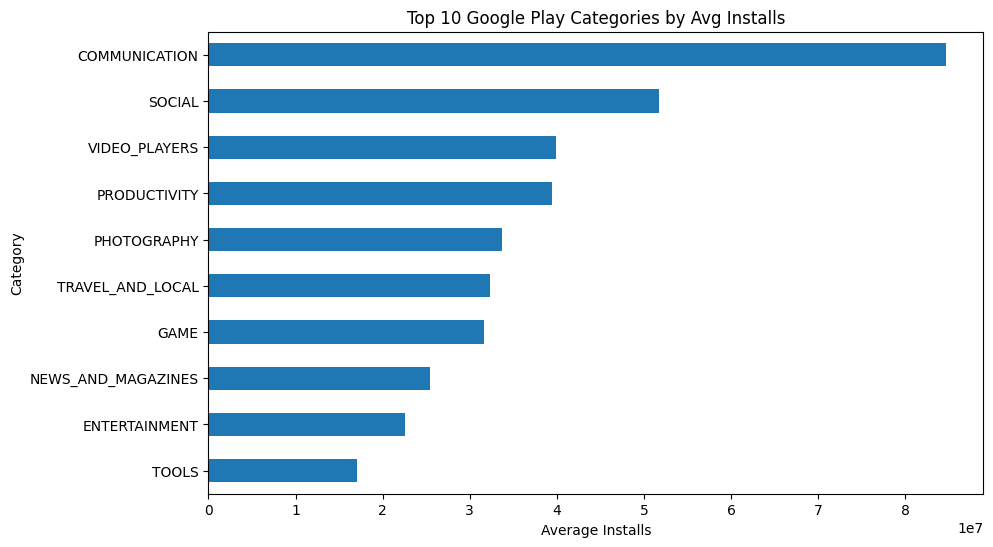

In [4]:
# Average installs per category
top_google = google_df.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
top_google[:10].plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 10 Google Play Categories by Avg Installs')
plt.xlabel('Average Installs')
plt.show()


In [7]:
apple_df.columns.tolist()


['App_Id',
 'App_Name',
 'AppStore_Url',
 'Primary_Genre',
 'Content_Rating',
 'Size_Bytes',
 'Required_IOS_Version',
 'Released',
 'Updated',
 'Version',
 'Price',
 'Currency',
 'Free',
 'DeveloperId',
 'Developer',
 'Developer_Url',
 'Developer_Website',
 'Average_User_Rating',
 'Reviews',
 'Current_Version_Score',
 'Current_Version_Reviews']

In [10]:
# Clean up column names if needed
apple_df.columns = [col.strip().lower().replace(" ", "_") for col in apple_df.columns]
apple_df.columns


Index(['app_id', 'app_name', 'appstore_url', 'primary_genre', 'content_rating',
       'size_bytes', 'required_ios_version', 'released', 'updated', 'version',
       'price', 'currency', 'free', 'developerid', 'developer',
       'developer_url', 'developer_website', 'average_user_rating', 'reviews',
       'current_version_score', 'current_version_reviews'],
      dtype='object')

In [14]:
apple_df.columns.tolist()


['app_id',
 'app_name',
 'appstore_url',
 'primary_genre',
 'content_rating',
 'size_bytes',
 'required_ios_version',
 'released',
 'updated',
 'version',
 'price',
 'currency',
 'free',
 'developerid',
 'developer',
 'developer_url',
 'developer_website',
 'average_user_rating',
 'reviews',
 'current_version_score',
 'current_version_reviews']

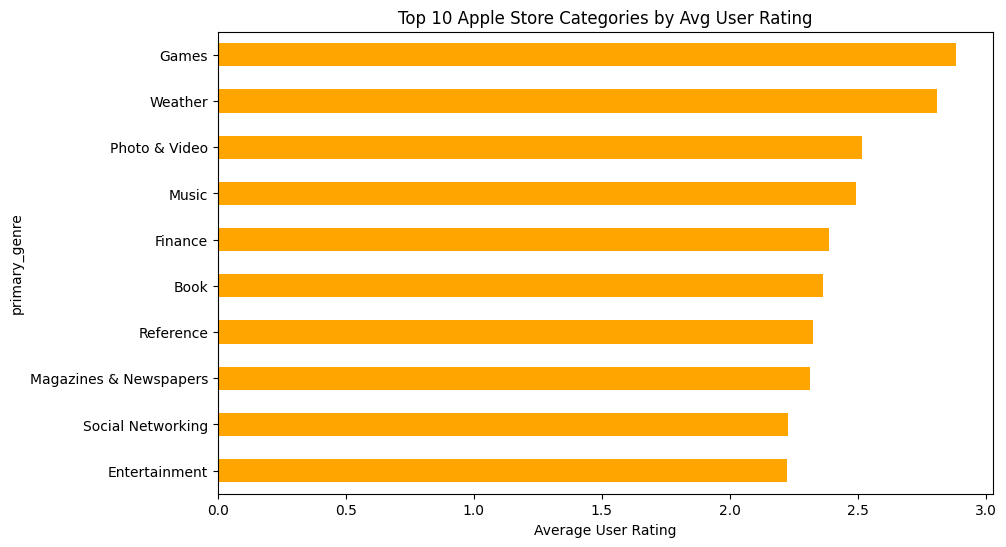

In [15]:
# Average user rating per genre
top_apple = apple_df.groupby('primary_genre')['average_user_rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
top_apple[:10].plot(kind='barh', color='orange')
plt.gca().invert_yaxis()
plt.title('Top 10 Apple Store Categories by Avg User Rating')
plt.xlabel('Average User Rating')
plt.show()


In [16]:
print("📈 Insights:")
print("- Google Play: Education, Tools, Entertainment categories have high installs.")
print("- Apple Store: Games, Photo & Video, Social Networking dominate user engagement.")
print("- 📱 Target ad-supported apps in those genres for high traffic and monetization potential.")
print("- 🧠 Focus on free, lightweight apps with clean UI and frequent updates.")


📈 Insights:
- Google Play: Education, Tools, Entertainment categories have high installs.
- Apple Store: Games, Photo & Video, Social Networking dominate user engagement.
- 📱 Target ad-supported apps in those genres for high traffic and monetization potential.
- 🧠 Focus on free, lightweight apps with clean UI and frequent updates.


In [3]:
with open("../insights.txt", "w") as file:
    file.write("Profitable App Recommendations:\n")
    file.write("- Education, Tools, Entertainment (Google Play)\n")
    file.write("- Games, Photo & Video, Social Networking (Apple)\n")
    file.write("- Prioritize free, ad-supported apps for higher reach.\n")
    file.write("- Clean UX, >4.3 ratings, 100K+ installs are success indicators.\n")
